In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from descartes import PolygonPatch
df = pd.read_csv("df_pep.csv")

In [3]:
df.head(5)

,pgm_year,grnt_pep_id,pep_agcy_nm,pep_proj_nm,citywide_cncl_dist_yn,grnt_l_pep_stts,pep_vrftn_dt,pep_to_mgmt_dt,pep_send_out_dt,grnt_l_send_out_mthd,...,pep_vrftn_comment,pep_to_mgmt_comment,cdbo_send_vrftn_comment,grnt_l_pep_stts_value,grnt_l_send_out_mthd_value,department,grnt_l_rec_color,grnt_l_rec_color_value,council_district,status_date
0,38,360093,CITY OF LOS ANGELES DEPARTMENT OF AGING,AGING DEPARTMENT - ADMINISTRATION,1.0,530,7/2/12,7/5/12,7/10/12,NaN,...,NaN,NaN,NaN,Approved,NaN,"AGING, DEPARTMENT OF",4.0,Green,NaN,7/10/12 13:47
1,38,361293,AIDS POLICY DEVELOPMENT,AIDS POLICY DEVELOPMENT,1.0,530,8/1/12,8/13/12,8/16/12,NaN,...,NaN,NaN,NaN,Approved,NaN,"DISABILITY, DEPARTMENT ON",4.0,Green,NaN,8/16/12 10:07
2,38,359811,BPW-OCB,BOARD OF PUBLIC WORKS - OCB,1.0,530,5/29/12,6/4/12,6/6/12,NaN,...,NaN,NaN,NaN,Approved,NaN,PUBLIC WORKS: BOARD OF PUBLIC WORKS,4.0,Green,NaN,6/6/12 9:15
3,38,359515,NaN,CITY ATTORNEY CDBG PROGRAM ADMINISTRATION FOR CDD,NaN,530,4/23/12,5/1/12,5/7/12,NaN,...,NaN,NaN,NaN,Approved,NaN,CITY ATTORNEY,4.0,Green,9,5/7/12 12:06
4,38,373603,COMMUNITY DEVELOPMENT DEPARTMENT,COMMISSION FOR COMMUNITY AND FAMILY SERVICES (...,1.0,530,12/28/12,1/4/13,1/11/13,NaN,...,NaN,NaN,NaN,Approved,NaN,COMMUNITY DEVELOPMENT DEPARTMENT,4.0,Green,NaN,1/11/13 10:08


In [4]:
# Column name in the df_pep.csv 
df_col = [f"{c[0]}:{c[1]}" for c in enumerate(df.columns)]
df_col

['0:pgm_year',
 '1:grnt_pep_id',
 '2:pep_agcy_nm',
 '3:pep_proj_nm',
 '4:citywide_cncl_dist_yn',
 '5:grnt_l_pep_stts',
 '6:pep_vrftn_dt',
 '7:pep_to_mgmt_dt',
 '8:pep_send_out_dt',
 '9:grnt_l_send_out_mthd',
 '10:cdbo_send_vrftn_dt',
 '11:pep_rcv_dt',
 '12:pep_rcv_dt_2',
 '13:grnt_l_pep_typ_value',
 '14:prjct_ttl',
 '15:cdbg_fnd_amt',
 '16:proj_id',
 '17:trackingcomment',
 '18:pep_vrftn_comment',
 '19:pep_to_mgmt_comment',
 '20:cdbo_send_vrftn_comment',
 '21:grnt_l_pep_stts_value',
 '22:grnt_l_send_out_mthd_value',
 '23:department',
 '24:grnt_l_rec_color',
 '25:grnt_l_rec_color_value',
 '26:council_district',
 '27:status_date']

In [5]:
# Number of Prrojects with no council district listed
df.council_district.isna().value_counts()

False    900
True     361
Name: council_district, dtype: int64

In [6]:
df.citywide_cncl_dist_yn.value_counts(dropna = False)

0.0    666
1.0    361
NaN    234
Name: citywide_cncl_dist_yn, dtype: int64

In [7]:
(df.council_district.str.count(",")+1).value_counts(dropna = False)

1.0     772
NaN     361
2.0      36
3.0      25
5.0      24
4.0      14
9.0       9
6.0       8
7.0       7
8.0       3
14.0      2
Name: council_district, dtype: int64

In [10]:
df.pgm_year.isna().value_counts()

False    1261
Name: pgm_year, dtype: int64

In [11]:
# Number of project per departments
df.department.value_counts(dropna = False)

HOUSING AND COMMUNITY INVESTMENT DEPARTMENT      400
ECONOMIC AND WORKFORCE DEVELOPMENT DEPARTMENT    178
COMMUNITY DEVELOPMENT DEPARTMENT                 172
AGING, DEPARTMENT OF                             126
DISABILITY, DEPARTMENT ON                        101
HOUSING DEPARTMENT                                97
RECREATION AND PARKS, DEPARTMENT OF               78
CITY ATTORNEY                                     27
PUBLIC WORKS: BOARD OF PUBLIC WORKS               20
PUBLIC WORKS: STREET LIGHTING, BUREAU OF          19
BUILDING & SAFETY, DEPARTMENT OF                   9
PUBLIC WORKS: ENGINEERING, BUREAU OF               9
PUBLIC WORKS: STREET SERVICES, BUREAU OF           7
CULTURAL AFFAIRS, DEPARTMENT OF                    6
TRANSPORTATION, DEPARTMENT OF (DOT)                6
MAYOR, OFFICE OF THE                               2
NON-DEPARTMENTAL (GENERAL)                         1
CITY ADMINISTRATIVE OFFICER                        1
COUNCIL DISTRICT #14                          

In [12]:
df.prjct_ttl.value_counts(dropna = False)

LA BUSINESS SOURCE PROGRAM                         103
DOMESTIC VIOLENCE SHELTER OPERATIONS                96
AGING SERVICES DELIVERY SYSTEM                      96
AIDS PREVENTION                                     94
LAHSA - HOMELESS EMERGENCY SHELTER AND SERVICES     54
                                                  ... 
CITY ATTORNEY - CDBG ADMINISTRATION FOR CDD          1
CHILDREN'S SAVINGS ACCOUNT (CSA)                     1
COUNCIL DISTRICT 6 STREET/SIDEWALK IMPROVEMENTS      1
94TH AND BROADWAY SITE IMPROVEMENTS                  1
SUMMER YOUTH EMPLOYMENT PROGRAM                      1
Name: prjct_ttl, Length: 279, dtype: int64

In [13]:
# Determine the number of council districts associated with each project
df['n_dist']=(df.council_district.str.count(",")+1)
df.head(30)

,pgm_year,grnt_pep_id,pep_agcy_nm,pep_proj_nm,citywide_cncl_dist_yn,grnt_l_pep_stts,pep_vrftn_dt,pep_to_mgmt_dt,pep_send_out_dt,grnt_l_send_out_mthd,...,pep_to_mgmt_comment,cdbo_send_vrftn_comment,grnt_l_pep_stts_value,grnt_l_send_out_mthd_value,department,grnt_l_rec_color,grnt_l_rec_color_value,council_district,status_date,n_dist
0,38,360093,CITY OF LOS ANGELES DEPARTMENT OF AGING,AGING DEPARTMENT - ADMINISTRATION,1.0,530,7/2/12,7/5/12,7/10/12,NaN,...,NaN,NaN,Approved,NaN,"AGING, DEPARTMENT OF",4.0,Green,NaN,7/10/12 13:47,NaN
1,38,361293,AIDS POLICY DEVELOPMENT,AIDS POLICY DEVELOPMENT,1.0,530,8/1/12,8/13/12,8/16/12,NaN,...,NaN,NaN,Approved,NaN,"DISABILITY, DEPARTMENT ON",4.0,Green,NaN,8/16/12 10:07,NaN
2,38,359811,BPW-OCB,BOARD OF PUBLIC WORKS - OCB,1.0,530,5/29/12,6/4/12,6/6/12,NaN,...,NaN,NaN,Approved,NaN,PUBLIC WORKS: BOARD OF PUBLIC WORKS,4.0,Green,NaN,6/6/12 9:15,NaN
3,38,359515,NaN,CITY ATTORNEY CDBG PROGRAM ADMINISTRATION FOR CDD,NaN,530,4/23/12,5/1/12,5/7/12,NaN,...,NaN,NaN,Approved,NaN,CITY ATTORNEY,4.0,Green,9,5/7/12 12:06,1.0
4,38,373603,COMMUNITY DEVELOPMENT DEPARTMENT,COMMISSION FOR COMMUNITY AND FAMILY SERVICES (...,1.0,530,12/28/12,1/4/13,1/11/13,NaN,...,NaN,NaN,Approved,NaN,COMMUNITY DEVELOPMENT DEPARTMENT,4.0,Green,NaN,1/11/13 10:08,NaN
5,38,361031,COMMUNITY DEVELOPMENT DEPT,COMMUNITY DEVELOPMENT DEPARTMENT (INCL RELATED...,1.0,530,6/12/12,6/13/12,6/14/12,NaN,...,NaN,NaN,Approved,NaN,COMMUNITY DEVELOPMENT DEPARTMENT,4.0,Green,NaN,6/14/12 8:10,NaN
6,38,360265,HOUSING RIGHTS CENTER,FAIR HOUSING,1.0,530,12/28/12,1/4/13,1/10/13,NaN,...,NaN,NaN,Approved,NaN,HOUSING DEPARTMENT,4.0,Green,NaN,1/10/13 10:27,NaN
7,38,361683,LOS ANGELES HOMELESS SERVICES AUTHORITY,LAHSA (LOS ANGELES HOMELESS SERVICES AUTHORITY),1.0,530,2/14/13,2/22/13,2/27/13,NaN,...,NaN,NaN,Approved,NaN,HOUSING DEPARTMENT,4.0,Green,NaN,2/27/13 10:04,NaN
8,38,360511,SHELTER PARTNERSHIP,LAHSA TECHNICAL ASSISTANCE,0.0,530,2/14/13,2/22/13,2/27/13,NaN,...,NaN,NaN,Approved,NaN,HOUSING DEPARTMENT,4.0,Green,9,2/27/13 10:02,1.0
9,38,361061,LOS ANGELES HOUSING DEPARTMENT,LOS ANGELES HOUSING DEPARTMENT,1.0,530,NaN,1/22/13,1/29/13,NaN,...,NaN,NaN,Approved,NaN,HOUSING DEPARTMENT,4.0,Green,NaN,1/29/13 12:12,NaN


In [14]:
# Funding amount totals associated with projects that have one or more council districts listed
df.groupby('n_dist').agg({'cdbg_fnd_amt':sum})/1e6

,cdbg_fnd_amt
n_dist,
1.0,245.989450
2.0,8.932613
3.0,3.620348
4.0,2.165210
5.0,2.924471
6.0,1.591997
7.0,0.418541
8.0,0.837739
9.0,2.775643


In [15]:
# Total funding amounts by departments
dfd = df.groupby('department').agg({'cdbg_fnd_amt':sum})/1e6
dfd

,cdbg_fnd_amt
department,
"AGING, DEPARTMENT OF",10.609135
"BUILDING & SAFETY, DEPARTMENT OF",17.013680
CITY ADMINISTRATIVE OFFICER,0.015000
CITY ATTORNEY,9.814349
COMMUNITY DEVELOPMENT DEPARTMENT,77.705636
COUNCIL DISTRICT #14,0.600000
"CULTURAL AFFAIRS, DEPARTMENT OF",9.785835
"DISABILITY, DEPARTMENT ON",5.147642
ECONOMIC AND WORKFORCE DEVELOPMENT DEPARTMENT,68.703643


In [16]:
# Project funding amounts by council district
cd_amt = df[df.n_dist == 1].groupby('council_district').agg({'cdbg_fnd_amt':sum})/1e6
cd_amt.sort_values(['cdbg_fnd_amt'], ascending=[False])

,cdbg_fnd_amt
council_district,
14,38.859189
10,33.279949
1,32.136832
9,25.851325
15,19.654782
8,18.712372
7,18.461835
13,18.049491
6,17.331413


In [17]:
# Project funding amounts per year
yr_amt = df.groupby('pgm_year').agg({'cdbg_fnd_amt':sum})/1e6
yr_amt.sort_values(['cdbg_fnd_amt'])

,cdbg_fnd_amt
pgm_year,
43,60.577741
42,65.289257
41,66.266533
44,68.418370
40,69.701280
45,74.834204
38,74.948437
39,76.431599


In [18]:
df.pgm_year.value_counts()

39    198
45    190
38    178
44    172
41    151
40    126
43    123
42    123
Name: pgm_year, dtype: int64

In [19]:
# The fund amount for project not associated with a council district
df[df.council_district.isna()].cdbg_fnd_amt.sum()/1e6

285.26445467

In [20]:
import geopandas as gpd
fp = "/Users/acl/Council Districts/geo_export_01a6c2eb-e9c9-46f5-97f9-03c414f86b9f.shp"
data = gpd.read_file(fp)
type(data)

geopandas.geodataframe.GeoDataFrame

In [31]:
# Funding amount totals per council district
gdf_dist_amt = data.merge(cd_amt, left_on=data.district.astype(int).astype(str), right_index=True)
gdf_dist_amt

,key_0,dist_name,district,name,objectid,geometry,cdbg_fnd_amt
0,1,1 - Gilbert Cedillo,1.0,Gilbert Cedillo,1.0,"POLYGON ((-118.26853 34.04664, -118.26878 34.0...",32.136832
1,2,2 - Paul Krekorian,2.0,Paul Krekorian,2.0,"POLYGON ((-118.33732 34.22103, -118.33455 34.2...",9.239296
2,3,3 - Bob Blumenfield,3.0,Bob Blumenfield,3.0,"POLYGON ((-118.51860 34.20840, -118.51859 34.2...",6.970220
3,4,4 - David Ryu,4.0,David Ryu,4.0,"POLYGON ((-118.43998 34.17939, -118.43998 34.1...",0.449000
4,5,5 - Paul Koretz,5.0,Paul Koretz,5.0,"POLYGON ((-118.51848 34.18661, -118.51849 34.1...",1.811198
5,6,6 - Nury Martinez,6.0,Nury Martinez,6.0,"POLYGON ((-118.36533 34.22870, -118.36417 34.2...",17.331413
6,7,7 - Monica Rodriguez,7.0,Monica Rodriguez,7.0,"POLYGON ((-118.33732 34.22103, -118.33732 34.2...",18.461835
7,8,8 - Marqueece Harris-Dawson,8.0,Marqueece Harris-Dawson,8.0,"POLYGON ((-118.30027 34.03694, -118.29635 34.0...",18.712372
8,9,9 - Curren D. Price Jr.,9.0,Curren D. Price Jr.,9.0,"POLYGON ((-118.23975 34.01479, -118.23976 34.0...",25.851325
9,10,10 - Herb J. Wesson Jr.,10.0,Herb J. Wesson Jr.,10.0,"POLYGON ((-118.28431 34.06371, -118.28420 34.0...",33.279949


In [34]:
import csv
gdf_dist_amt.to_csv('gdf_dist_amt.csv', index=False, header=True)

In [36]:
dca = pd.read_csv("gdf_dist_amt.csv")
dca.head(15)

,key_0,dist_name,district,name,objectid,geometry,cdbg_fnd_amt
0,1,1 - Gilbert Cedillo,1.0,Gilbert Cedillo,1.0,"POLYGON ((-118.2685295644051 34.0466429340963,...",32.136832
1,2,2 - Paul Krekorian,2.0,Paul Krekorian,2.0,POLYGON ((-118.3373182931317 34.22103151374687...,9.239296
2,3,3 - Bob Blumenfield,3.0,Bob Blumenfield,3.0,POLYGON ((-118.5185960001731 34.20840100071815...,6.970220
3,4,4 - David Ryu,4.0,David Ryu,4.0,POLYGON ((-118.4399770003671 34.17939499943158...,0.449000
4,5,5 - Paul Koretz,5.0,Paul Koretz,5.0,POLYGON ((-118.5184810000027 34.18661300013556...,1.811198
5,6,6 - Nury Martinez,6.0,Nury Martinez,6.0,"POLYGON ((-118.365326000157 34.2287029993718, ...",17.331413
6,7,7 - Monica Rodriguez,7.0,Monica Rodriguez,7.0,POLYGON ((-118.3373182931317 34.22103151374687...,18.461835
7,8,8 - Marqueece Harris-Dawson,8.0,Marqueece Harris-Dawson,8.0,POLYGON ((-118.3002720001734 34.03693900033443...,18.712372
8,9,9 - Curren D. Price Jr.,9.0,Curren D. Price Jr.,9.0,POLYGON ((-118.2397549555836 34.01479479563884...,25.851325
9,10,10 - Herb J. Wesson Jr.,10.0,Herb J. Wesson Jr.,10.0,POLYGON ((-118.2843063056015 34.06371498771665...,33.279949


In [22]:
import shapefile

with shapefile.Reader("/Users/acl/Council Districts/geo_export_01a6c2eb-e9c9-46f5-97f9-03c414f86b9f.shp") as shp:
    print(shp)

shapefile Reader
    15 shapes (type 'POLYGON')
    15 records (5 fields)


In [23]:
data.astype({'district': int,'objectid': int})

,dist_name,district,name,objectid,geometry
0,1 - Gilbert Cedillo,1,Gilbert Cedillo,1,"POLYGON ((-118.26853 34.04664, -118.26878 34.0..."
1,2 - Paul Krekorian,2,Paul Krekorian,2,"POLYGON ((-118.33732 34.22103, -118.33455 34.2..."
2,3 - Bob Blumenfield,3,Bob Blumenfield,3,"POLYGON ((-118.51860 34.20840, -118.51859 34.2..."
3,4 - David Ryu,4,David Ryu,4,"POLYGON ((-118.43998 34.17939, -118.43998 34.1..."
4,5 - Paul Koretz,5,Paul Koretz,5,"POLYGON ((-118.51848 34.18661, -118.51849 34.1..."
5,6 - Nury Martinez,6,Nury Martinez,6,"POLYGON ((-118.36533 34.22870, -118.36417 34.2..."
6,7 - Monica Rodriguez,7,Monica Rodriguez,7,"POLYGON ((-118.33732 34.22103, -118.33732 34.2..."
7,8 - Marqueece Harris-Dawson,8,Marqueece Harris-Dawson,8,"POLYGON ((-118.30027 34.03694, -118.29635 34.0..."
8,9 - Curren D. Price Jr.,9,Curren D. Price Jr.,9,"POLYGON ((-118.23975 34.01479, -118.23976 34.0..."
9,10 - Herb J. Wesson Jr.,10,Herb J. Wesson Jr.,10,"POLYGON ((-118.28431 34.06371, -118.28420 34.0..."


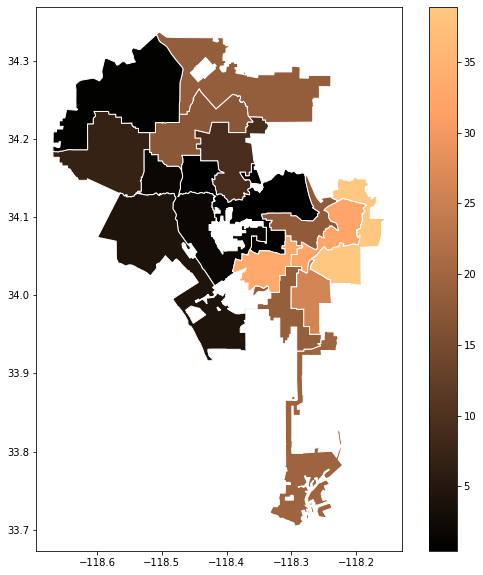

In [29]:
%matplotlib inline
gdf_dist_amt.plot(column = 'cdbg_fnd_amt', figsize=(10, 10), cmap = 'copper', legend = True, edgecolor='w')

In [25]:
cd = gpd.read_file("/Users/acl/Council Districts/geo_export_01a6c2eb-e9c9-46f5-97f9-03c414f86b9f.shp")

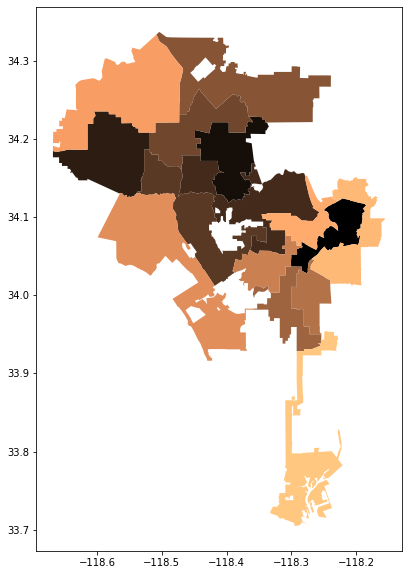

In [30]:
%matplotlib inline
cd.plot(cmap = 'copper', legend = True, figsize=(10, 10))

AttributeError: module 'geopandas' has no attribute 'iterrows'

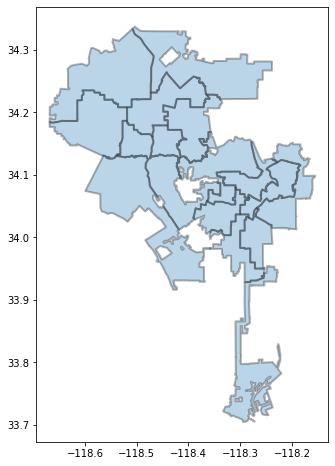

In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt

council_districts = geopandas.read_file("https://opendata.arcgis.com/datasets/76104f230e384f38871eb3c4782f903d_13.geojson")
fig, ax = plt.subplots(figsize=(8,8))

council_districts.plot(ax=ax, alpha=0.3, linewidth=2, edgecolor="black")

for idx, district in gpd.iterrows():
    p = district.geometry.representative_point()
    ax.text(p.x, p.y, str(district.District))
    
fig